### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

### Read Data

In [2]:
data = pd.read_csv("dataset/iris.csv")
data.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Pre-Processing & EDA

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [7]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # konversi numerik
data['class'] = le.fit_transform(data['class'])
data.head(5)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


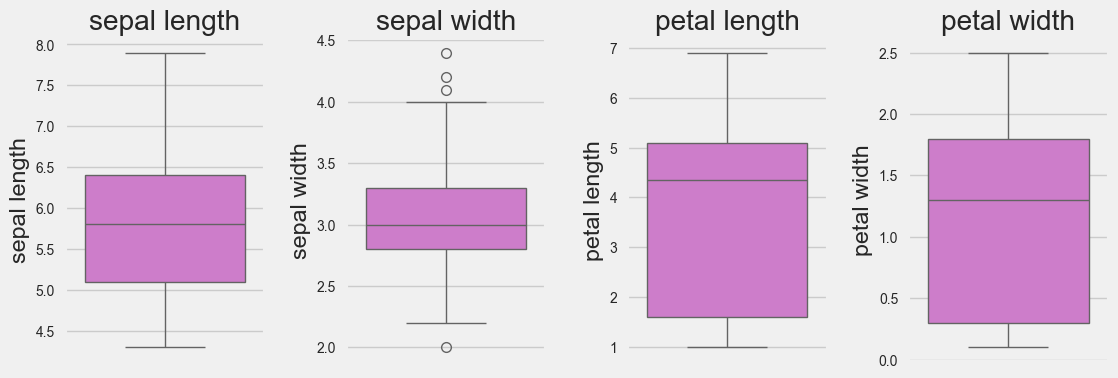

In [11]:
def box_plot(data):
  variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

  fig, axes = plt.subplots(1, 4, figsize=(12, 4))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color="orchid", ax=axes[i])
    axes[i].set_title(var)  

  plt.show()

box_plot(data)

Berdasarkan box plot di atas diketahui bahwa jumlah outlier hanya 4 buah. Dengan demikian, handle outlier bersifat opsional karena tidak akan berpengaruh secara signifikan pada hasil akhir nanti.

In [12]:
data.drop('class', axis=1, inplace=True)

Menghapus kolom class karena tidak diperlukan.

In [13]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(data)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Modelling
#### K-Means

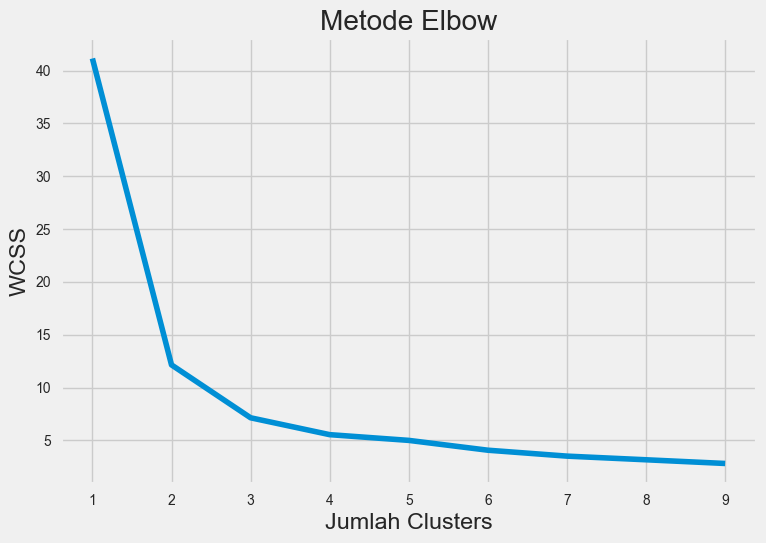

In [15]:
# Menggunakan metode elbow untuk menentukan jumlah klaster yang sesuai
wcss = []
for i in range (1,10):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

Berdasarkan grafik dari metode elbow di atas, posisi siku berada di sekitar 2 dan 3 pada jumlah cluters. Dengan hal ini kita dapat mengambil 2 atau 3 nilai k atau n_clusters. Disini kita mengambil 3 sebagai nilai k.

In [19]:
# Menjalankan K-Means clustering ke dataset
model1 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

model1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [30]:
# Menyimpan hasil K-Means ke dalam kolom data
data['Label_K-Means'] = model1.labels_
data.head(5)

,sepal length,sepal width,petal length,petal width,Label_K-Means
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


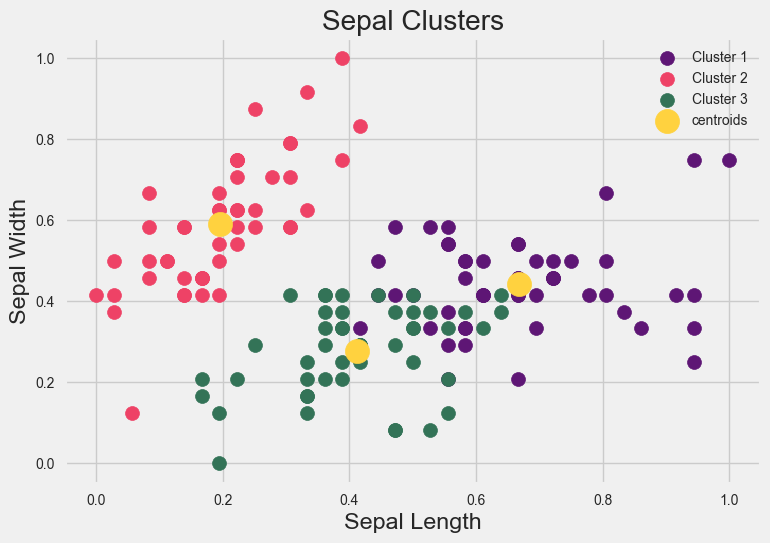

In [23]:
# visual clusters
plt.scatter(X_scaled[y_pred1 == 0, 0], X_scaled[y_pred1 == 0, 1],
           s = 100, c = '#5E1675', label='Cluster 1')

plt.scatter(X_scaled[y_pred1 == 1, 0], X_scaled[y_pred1 == 1, 1],
           s = 100, c = '#EE4266', label='Cluster 2')

plt.scatter(X_scaled[y_pred1 == 2, 0], X_scaled[y_pred1 == 2, 1],
           s = 100, c = '#337357', label='Cluster 3')


plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1],
           s = 300, c = '#FFD23F', label = 'centroids')

plt.title("Sepal Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.show()

Berdasarkan hasil clustering menggunakan algoritma K-Means di atas, plot membentuk tiga kluster yang terbentuk dari kolom Sepal Length dan Sepal Width. Berikut interpretasi masing-masing kluster berdasarkan hasil K-Means.
1. <b>Kluster 1 (Ungu)</b>: Kluster ini memiliki nilai Sepal Length yang cenderung lebih tinggi dan Sepal Width yang bervariasi, namun sebagian besar berada di nilai yang lebih rendah dibandingkan dengan kluster lainnya. Hal ini dapat menunjukkan bahwa spesimen dalam kelompok ini memiliki karakteristik sepal yang lebih panjang namun relatif sempit.
2. <b>Kluster 2 (Merah Muda)</b>: Kluster ini mencakup titik-titik data yang memiliki Sepal Width lebih tinggi dan Sepal Length sedang. Posisi ini menunjukkan bahwa spesimen dalam kluster ini cenderung memiliki sepal yang lebar namun tidak terlalu panjang.
3. <b>Kluster 3 (Hijau)</b>: Terletak di bagian tengah bawah plot, kluster ini berisi spesimen dengan nilai Sepal Length yang sedang dan Sepal Width yang rendah. Ini menunjukkan karakteristik spesimen dengan sepal yang relatif pendek dan sempit.<br>

Titik centroid pada setiap kluster (ditandai dengan warna kuning) merupakan titik tengah atau pusat dari setiap kluster hasil K-Means. Centroid ini mewakili nilai rata-rata dari atribut Sepal Length dan Sepal Width dalam kluster tersebut, sehingga membantu memvisualisasikan pusat dari tiap kluster.

#### DB-SCAN

In [25]:
model2 = DBSCAN(eps=0.4, min_samples=5)

model2.fit(X_scaled)

y_pred2 = model2.labels_
y_pred2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [31]:
# Menyimpan hasil DB-Scan ke dalam kolom data
data['Label_DB-Scan'] = model2.labels_
data.head(5)

,sepal length,sepal width,petal length,petal width,Label_K-Means,Label_DB-Scan
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [36]:
df = data.copy()

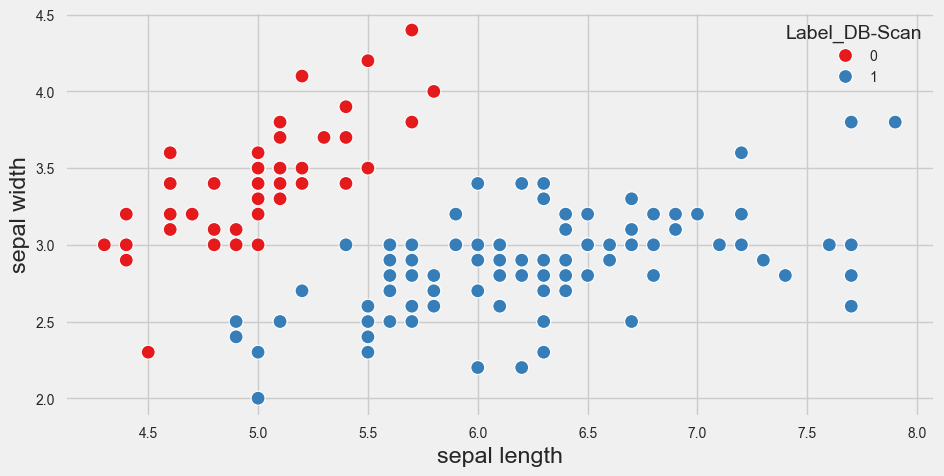

In [41]:
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'sepal length', y = 'sepal width',
                hue = 'Label_DB-Scan', data = df, palette = 'Set1', s = 100);

Berdasarkan scatter plot yang dihasilkan oleh algoritma DBSCAN di atas, terdapat dua kluster utama yang ditandai dengan warna sebagai berikut.
1. <b>Warna merah (Label 0)</b>: Titik-titik pada kluster ini terletak di wilayah dengan sepal length yang relatif lebih pendek (sekitar 4.5 hingga 5.5) dan sepal width yang lebih besar (3.0 hingga 4.5). Kluster ini menunjukkan bahwa kelompok data ini memiliki karakteristik sepal yang lebih lebar tetapi lebih pendek.
2. <b>Warna biru (Label 1)</b>: Titik-titik pada kluster ini tersebar lebih luas dengan sepal length yang lebih panjang (sekitar 5.5 hingga 7.5) dan sepal width yang lebih kecil (sekitar 2.0 hingga 3.5). Kluster ini mewakili kelompok dengan sepal yang lebih panjang tetapi lebih sempit.<br>

DBSCAN berhasil memisahkan data ke dalam dua kluster berdasarkan karakteristik panjang dan lebar sepal. Kluster merah kemungkinan mewakili jenis tumbuhan dengan dimensi sepal yang lebih besar tetapi pendek, sedangkan kluster biru mencakup spesies dengan sepal yang lebih ramping dan panjang.

### Metrics Evaluation
#### Silhouette

In [45]:
# Silhouette score untuk KMeans
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Silhouette score: ", Evaluasi_KMeans)

Silhouette score:  0.48247222154221125


Hasil evaluasi Silhouette Score untuk algoritma K-Means adalah <b>0.4824</b>. Nilai ini menunjukkan bahwa hasil klasterisasi dengan K-Means memiliki kualitas yang cukup baik, tetapi belum optimal. Nilai ini mengindikasikan bahwa sebagian besar data berada pada klaster yang tepat, namun terdapat beberapa data yang mungkin berada di tepi antara dua klaster atau kurang sesuai dengan klasternya. Dalam hal ini, klasterisasi K-Means dapat digunakan, namun perlu dievaluasi lebih lanjut apakah jumlah klaster (k) sudah optimal atau tidak.

In [46]:
# Silhouette score untuk DBSCAN
Evaluasi_dbscan = silhouette_score(X_scaled, y_pred2)
print("Silhoutte Score:", Evaluasi_dbscan)

Silhoutte Score: 0.6294675561906644


Hasil evaluasi Silhouette Score untuk algoritma DBSCAN adalah <b>0.6295</b>. Nilai ini lebih tinggi dibandingkan dengan K-Means, yang menunjukkan bahwa DBSCAN memberikan hasil klasterisasi yang lebih baik dalam memisahkan data ke dalam klaster yang sesuai. Nilai ini mengindikasikan bahwa data dalam masing-masing klaster lebih homogen (lebih mirip satu sama lain) dan lebih berbeda dengan klaster lainnya, sehingga algoritma DBSCAN lebih efektif dalam dataset iris ini.

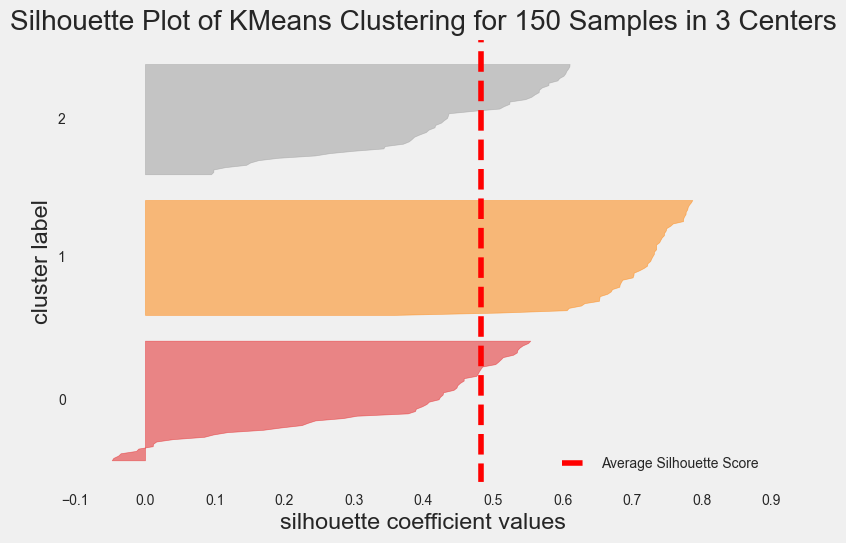

In [44]:
# Silhouette Visual untuk KMeans
silhouette_viz = SilhouetteVisualizer(model1)
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

#### Davies-Bouldin Index (DBI) 

In [47]:
# DBI score untuk KMeans
dbi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies-Bouldin Index (DBI):", dbi_score1)

Davies-Bouldin Index (DBI): 0.7874978912757878


Nilai DBI untuk algoritma K-Means adalah <b>0.7875</b>. Davies-Bouldin Index diukur berdasarkan seberapa baik klaster terbentuk. Semakin kecil nilai DBI, semakin baik hasil klasterisasi. Nilai 0.7875 menunjukkan bahwa klaster yang terbentuk oleh K-Means cukup baik, tetapi masih ada beberapa klaster yang kurang terpisah atau memiliki tumpang tindih dengan klaster lainnya. Dalam hal ini, algoritma K-Means masih membutuhkan evaluasi tambahan, seperti memeriksa jumlah klaster (k) yang dipilih atau distribusi data dalam masing-masing klaster.

In [48]:
# DBI score untuk DBSCAN
dbi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies-Bouldin Index (DBI):", dbi_score2)

Davies-Bouldin Index (DBI): 0.48770481288357487


Nilai DBI untuk algoritma DBSCAN adalah <b>0.4877</b>, yang lebih rendah dibandingkan dengan K-Means. Hal ini menunjukkan bahwa klaster yang dihasilkan oleh DBSCAN lebih terpisah dan lebih kompak dibandingkan dengan K-Means. Dengan nilai DBI yang lebih kecil, DBSCAN mampu menangani karakteristik data secara lebih baik, termasuk menangani outlier dan klaster yang berbentuk tidak beraturan.